In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
state = 'rajasthan'
path = "datasets/" + state + "_data.csv"
df = pd.read_csv(path, skiprows=13)
model_path = state + '_predictor'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         53424 non-null  int64  
 1   MO           53424 non-null  int64  
 2   DY           53424 non-null  int64  
 3   HR           53424 non-null  int64  
 4   ALLSKY_KT    53424 non-null  float64
 5   T2M          53424 non-null  float64
 6   QV2M         53424 non-null  float64
 7   PRECTOTCORR  53424 non-null  float64
 8   PS           53424 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.7 MB


In [7]:
dfcpy = df.copy()

In [8]:
dfcpy.describe()

,YEAR,MO,DY,HR,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
count,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000
mean,2020.555368,6.438997,15.707023,11.500000,-504.463314,25.274911,7.560094,-1.301091,97.163607
std,1.749221,3.486892,8.810511,6.922251,499.733944,38.783703,37.380885,36.656099,40.275746
min,2018.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,2019.000000,3.000000,8.000000,5.750000,-999.000000,19.420000,4.390000,0.000000,97.990000
50%,2021.000000,6.000000,16.000000,11.500000,-999.000000,28.000000,6.840000,0.000000,98.650000
75%,2022.000000,9.000000,23.000000,17.250000,0.540000,33.830000,13.610000,0.000000,99.280000
max,2024.000000,12.000000,31.000000,23.000000,0.830000,47.400000,24.350000,114.260000,100.390000


In [9]:
df['ALLSKY_KT'].value_counts()

ALLSKY_KT
-999.00    26991
 0.62       1079
 0.66       1075
 0.59        992
 0.70        962
           ...  
 0.81          7
 0.82          5
 0.04          4
 0.83          4
 0.03          2
Name: count, Length: 82, dtype: int64

In [10]:
dfcpy.drop(columns=['ALLSKY_KT'], inplace=True)

In [11]:
dfcpy


,YEAR,MO,DY,HR,T2M,QV2M,PRECTOTCORR,PS
0,2018,1,1,5,9.42,1.83,0.0,99.17
1,2018,1,1,6,8.75,1.83,0.0,99.22
2,2018,1,1,7,8.57,1.89,0.0,99.28
3,2018,1,1,8,10.89,1.95,0.0,99.34
4,2018,1,1,9,13.25,1.89,0.0,99.39
...,...,...,...,...,...,...,...,...
53419,2024,2,5,0,-999.00,-999.00,-999.0,-999.00
53420,2024,2,5,1,-999.00,-999.00,-999.0,-999.00
53421,2024,2,5,2,-999.00,-999.00,-999.0,-999.00
53422,2024,2,5,3,-999.00,-999.00,-999.0,-999.00


In [12]:
cols=["YEAR","MO","DY"]
dfcpy['DATE'] = dfcpy[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [13]:
dfcpy['DATETIME'] = pd.to_datetime(dfcpy['DATE'] + ' ' + dfcpy['HR'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

In [14]:
dfcpy.drop(columns=['YEAR', 'DY', 'MO', 'HR'], inplace=True)

In [15]:
dfcpy.drop(columns=['DATE'], inplace=True)

In [16]:
dfcpy

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
0,9.42,1.83,0.0,99.17,2018-01-01 05:00:00
1,8.75,1.83,0.0,99.22,2018-01-01 06:00:00
2,8.57,1.89,0.0,99.28,2018-01-01 07:00:00
3,10.89,1.95,0.0,99.34,2018-01-01 08:00:00
4,13.25,1.89,0.0,99.39,2018-01-01 09:00:00
...,...,...,...,...,...
53419,-999.00,-999.00,-999.0,-999.00,2024-02-05 00:00:00
53420,-999.00,-999.00,-999.0,-999.00,2024-02-05 01:00:00
53421,-999.00,-999.00,-999.0,-999.00,2024-02-05 02:00:00
53422,-999.00,-999.00,-999.0,-999.00,2024-02-05 03:00:00


In [17]:
dfcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   T2M          53424 non-null  float64       
 1   QV2M         53424 non-null  float64       
 2   PRECTOTCORR  53424 non-null  float64       
 3   PS           53424 non-null  float64       
 4   DATETIME     53424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 MB


In [18]:
dfcpy.describe()

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
count,53424.000000,53424.000000,53424.000000,53424.000000,53424
mean,25.274911,7.560094,-1.301091,97.163607,2021-01-18 04:30:00
min,-999.000000,-999.000000,-999.000000,-999.000000,2018-01-01 05:00:00
25%,19.420000,4.390000,0.000000,97.990000,2019-07-11 16:45:00
50%,28.000000,6.840000,0.000000,98.650000,2021-01-18 04:30:00
75%,33.830000,13.610000,0.000000,99.280000,2022-07-28 16:15:00
max,47.400000,24.350000,114.260000,100.390000,2024-02-05 04:00:00
std,38.783703,37.380885,36.656099,40.275746,NaN


In [19]:
temp = dfcpy.iloc[:52000]

In [20]:
temp

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
0,9.42,1.83,0.0,99.17,2018-01-01 05:00:00
1,8.75,1.83,0.0,99.22,2018-01-01 06:00:00
2,8.57,1.89,0.0,99.28,2018-01-01 07:00:00
3,10.89,1.95,0.0,99.34,2018-01-01 08:00:00
4,13.25,1.89,0.0,99.39,2018-01-01 09:00:00
...,...,...,...,...,...
51995,22.61,5.13,0.0,99.24,2023-12-07 16:00:00
51996,20.34,5.00,0.0,99.28,2023-12-07 17:00:00
51997,19.39,5.00,0.0,99.33,2023-12-07 18:00:00
51998,18.68,5.00,0.0,99.37,2023-12-07 19:00:00


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [22]:
temp_df = pd.DataFrame({'TEMP': temp['T2M'], 'PRESSURE': temp['PS'], 'HUMIDITY': temp['QV2M']})
temp_df['DAY'] = df['DY']
temp_df['HOUR'] = df['HR']
temp_df['MONTH'] = df['MO']

In [23]:
temp_df

,TEMP,PRESSURE,HUMIDITY,DAY,HOUR,MONTH
0,9.42,99.17,1.83,1,5,1
1,8.75,99.22,1.83,1,6,1
2,8.57,99.28,1.89,1,7,1
3,10.89,99.34,1.95,1,8,1
4,13.25,99.39,1.89,1,9,1
...,...,...,...,...,...,...
51995,22.61,99.24,5.13,7,16,12
51996,20.34,99.28,5.00,7,17,12
51997,19.39,99.33,5.00,7,18,12
51998,18.68,99.37,5.00,7,19,12


In [24]:
def df_to_XY(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][:3]
        y.append(label)
    return np.array(X), np.array(y)

In [25]:
X, y = df_to_XY(temp_df)
X.shape, y.shape

((51995, 5, 6), (51995, 3))

In [26]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:51000], y[50000:51000]
X_test, y_test = X[51000:], y[51000:]

In [27]:
X_train

array([[[ 9.42, 99.17,  1.83,  1.  ,  5.  ,  1.  ],
        [ 8.75, 99.22,  1.83,  1.  ,  6.  ,  1.  ],
        [ 8.57, 99.28,  1.89,  1.  ,  7.  ,  1.  ],
        [10.89, 99.34,  1.95,  1.  ,  8.  ,  1.  ],
        [13.25, 99.39,  1.89,  1.  ,  9.  ,  1.  ]],

       [[ 8.75, 99.22,  1.83,  1.  ,  6.  ,  1.  ],
        [ 8.57, 99.28,  1.89,  1.  ,  7.  ,  1.  ],
        [10.89, 99.34,  1.95,  1.  ,  8.  ,  1.  ],
        [13.25, 99.39,  1.89,  1.  ,  9.  ,  1.  ],
        [17.  , 99.38,  1.89,  1.  , 10.  ,  1.  ]],

       [[ 8.57, 99.28,  1.89,  1.  ,  7.  ,  1.  ],
        [10.89, 99.34,  1.95,  1.  ,  8.  ,  1.  ],
        [13.25, 99.39,  1.89,  1.  ,  9.  ,  1.  ],
        [17.  , 99.38,  1.89,  1.  , 10.  ,  1.  ],
        [20.72, 99.33,  1.89,  1.  , 11.  ,  1.  ]],

       ...,

       [[37.76, 98.36, 15.99, 15.  , 10.  ,  9.  ],
        [38.68, 98.31, 15.81, 15.  , 11.  ,  9.  ],
        [39.23, 98.23, 15.75, 15.  , 12.  ,  9.  ],
        [39.4 , 98.14, 15.81, 15.  , 13.  ,  

In [28]:
y_train

array([[17.  , 99.38,  1.89],
       [20.72, 99.33,  1.89],
       [22.  , 99.24,  1.95],
       ...,
       [38.57, 98.01, 16.05],
       [37.62, 98.02, 16.24],
       [36.31, 98.04, 16.78]])

In [29]:
temp_df

,TEMP,PRESSURE,HUMIDITY,DAY,HOUR,MONTH
0,9.42,99.17,1.83,1,5,1
1,8.75,99.22,1.83,1,6,1
2,8.57,99.28,1.89,1,7,1
3,10.89,99.34,1.95,1,8,1
4,13.25,99.39,1.89,1,9,1
...,...,...,...,...,...,...
51995,22.61,99.24,5.13,7,16,12
51996,20.34,99.28,5.00,7,17,12
51997,19.39,99.33,5.00,7,18,12
51998,18.68,99.37,5.00,7,19,12


In [30]:
cpy = temp_df[['TEMP', 'PRESSURE', 'HUMIDITY']].copy()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
cpy = scaler.fit_transform(cpy)

In [33]:
cpy

array([[-1.89709473,  0.75264499, -1.30973901],
       [-1.96946288,  0.82087145, -1.30973901],
       [-1.98890507,  0.90274321, -1.29883406],
       ...,
       [-0.82021345,  0.97096968, -0.733594  ],
       [-0.89690209,  1.02555085, -0.733594  ],
       [-0.93686659,  1.03919615, -0.733594  ]])

In [34]:
temp_df[['TEMP', 'PRESSURE', 'HUMIDITY']] = pd.DataFrame(cpy, columns=scaler.get_feature_names_out())

In [35]:
temp_df

,TEMP,PRESSURE,HUMIDITY,DAY,HOUR,MONTH
0,-1.897095,0.752645,-1.309739,1,5,1
1,-1.969463,0.820871,-1.309739,1,6,1
2,-1.988905,0.902743,-1.298834,1,7,1
3,-1.738317,0.984615,-1.287929,1,8,1
4,-1.483408,1.052841,-1.298834,1,9,1
...,...,...,...,...,...,...
51995,-0.472414,0.848162,-0.709967,7,16,12
51996,-0.717602,0.902743,-0.733594,7,17,12
51997,-0.820213,0.970970,-0.733594,7,18,12
51998,-0.896902,1.025551,-0.733594,7,19,12


In [36]:
X, y = df_to_XY(temp_df)
X.shape, y.shape

((51995, 5, 6), (51995, 3))

In [37]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:51000], y[50000:51000]
X_test, y_test = X[51000:52000], y[51000:52000]

In [38]:
# model = Sequential()
# model.add(InputLayer((5, 6)))
# model.add(LSTM(64))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(3, activation='linear'))

# model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 18723 (73.14 KB)
Trainable params: 18723 (73.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# cp = ModelCheckpoint(model_path, save_best_only=True)
# model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10

1563/1563 [==============================] - ETA: 0s - loss: 0.5167 - root_mean_squared_error: 0.7188INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 10s 5ms/step - loss: 0.5167 - root_mean_squared_error: 0.7188 - val_loss: 0.1130 - val_root_mean_squared_error: 0.3361
Epoch 2/10
1554/1563 [============================>.] - ETA: 0s - loss: 0.1898 - root_mean_squared_error: 0.4356INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.1893 - root_mean_squared_error: 0.4351 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1876
Epoch 3/10
1552/1563 [============================>.] - ETA: 0s - loss: 0.0533 - root_mean_squared_error: 0.2309INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0531 - root_mean_squared_error: 0.2304 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1185
Epoch 4/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.1051INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 5/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0798INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0064 - root_mean_squared_error: 0.0798 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0799
Epoch 6/10
1550/1563 [============================>.] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0689INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0689 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 7/10
1550/1563 [============================>.] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0616INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0662
Epoch 8/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0563INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 9s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0563 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 9/10
1550/1563 [============================>.] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0524INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 10/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0493INFO:tensorflow:Assets written to: haryana_predictor\assets


INFO:tensorflow:Assets written to: haryana_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0531


In [41]:
from tensorflow.keras.models import load_model
model = load_model(model_path)

In [42]:
def plot_predictions(model, X, y, start=0, end=100):
    pred = model.predict(X)
    tcap, pcap, hcap = pred[:,0], pred[:,1], pred[:,2]
    tact, pact, hact = y[:,0], y[:,1], y[:,2]
    df = pd.DataFrame(data={'tcap': tcap, 'tact': tact, 'pcap': pcap, 'pact': pact, 'hcap': hcap, 'hact': hact})
    plt.plot(tcap[start:end], ':r')
    plt.plot(tact[start:end], 'y')
    plt.plot(hcap[start:end], ':b')
    plt.plot(hact[start:end], 'c')
    plt.plot(pcap[start:end], ':g')
    plt.plot(pact[start:end], 'm')
    plt.legend()
    plt.show()
    return df[start:end]

32/32 [==============================] - 0s 2ms/step


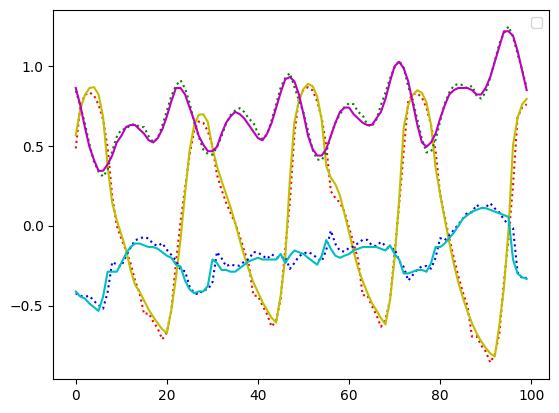

,tcap,tact,pcap,pact,hcap,hact
0,0.483418,0.566663,0.844525,0.861807,-0.423889,-0.411898
1,0.749901,0.728681,0.747058,0.752645,-0.440287,-0.444613
2,0.818652,0.817251,0.640787,0.616192,-0.444663,-0.455518
3,0.833913,0.861536,0.510239,0.493384,-0.439351,-0.488233
4,0.814744,0.866937,0.399776,0.411513,-0.471704,-0.510042
...,...,...,...,...,...,...
95,-0.081067,-0.026324,1.246582,1.216585,0.006284,0.055198
96,0.250393,0.502936,1.181783,1.189294,-0.014240,-0.211974
97,0.678913,0.673595,1.073856,1.093777,-0.292206,-0.299213
98,0.739644,0.758924,0.977301,0.970970,-0.328019,-0.322841


In [43]:
plot_predictions(model, X_test, y_test)

In [44]:
model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


array([[ 0.4834179 ,  0.84452474, -0.42388874],
       [ 0.7499013 ,  0.7470577 , -0.44028705],
       [ 0.8186517 ,  0.6407871 , -0.44466317],
       ...,
       [-0.8229954 ,  1.005558  , -0.7119515 ],
       [-0.9183792 ,  1.0502378 , -0.7233055 ],
       [-0.98734033,  1.0774136 , -0.72795415]], dtype=float32)

In [45]:
original_predictions = scaler.inverse_transform(model.predict(X_test))

32/32 [==============================] - 0s 2ms/step


In [46]:
original_predictions

array([[31.459301 , 99.237335 ,  6.7040253],
       [33.926464 , 99.16591  ,  6.6138005],
       [34.56297  , 99.08803  ,  6.5897226],
       ...,
       [19.364244 , 99.35535  ,  5.119079 ],
       [18.481161 , 99.38809  ,  5.056608 ],
       [17.842703 , 99.408005 ,  5.031031 ]], dtype=float32)

In [47]:
scaler.inverse_transform(y_test)

array([[32.23, 99.25,  6.77],
       [33.73, 99.17,  6.59],
       [34.55, 99.07,  6.53],
       ...,
       [19.39, 99.33,  5.  ],
       [18.68, 99.37,  5.  ],
       [18.31, 99.38,  5.  ]])

In [48]:
scaler.inverse_transform([[-1, -1, -1]])
# this is how u do it

array([[17.7254972 , 97.88556811,  3.53421102]])

In [3]:
import sqlite3
con = sqlite3.connect('mega.db')
cur = con.cursor()

cur.execute(
    """
    CREATE TABLE IF NOT EXISTS rajasthan_final(
        day INT,
        month INT,
        year INT,
        hour INT,
        temp REAL,
        pressure REAL,
        humidity REAL
    )
    """
)

In [50]:
x = -165
itr = temp_df.iloc[x:x+5].values
itr = itr.tolist()
# will be used for predictions!
# 2024 jan
itr

[[-1.146410187365598,
  1.2165849599531173,
  -0.12291664421966746,
  1.0,
  0.0,
  12.0],
 [-1.1993361480735716,
  1.2029396666622225,
  -0.10110673848480625,
  1.0,
  1.0,
  12.0],
 [-1.2501018654873421,
  1.2165849599531173,
  -0.06657438773794305,
  1.0,
  2.0,
  12.0],
 [-1.2965470963127066,
  1.2029396666622225,
  -0.03385952913565158,
  1.0,
  3.0,
  12.0],
 [-1.3386718405496651,
  1.2711661331166577,
  -0.0011446705333600956,
  1.0,
  4.0,
  12.0]]

In [56]:
def commit_values():
    
    con = sqlite3.connect('mega.db')
    cur = con.cursor()
    
    values = []
    window = itr.copy()
    day = window[0][3]
    hour = window[0][4]
    month = window[0][5]
    print(day, hour, month)
    for i in range(5):
        temp = []
        temp.append(window[i][0])
        temp.append(window[i][1])
        temp.append(window[i][2])
        values.append(scaler.inverse_transform([temp]))
        
    year = 2023    
    while (year<=2024):
        pred = model.predict(np.expand_dims(window, axis=0))[0]
        values.append((scaler.inverse_transform([pred])).ravel())
        window.append([pred[0], pred[1], pred[2], day, hour, month])
        window.pop(0)
        hour += 1
        if (hour>=24):
            hour = 0
            day += 1
            if (day==28):
                if (month==2):
                    day = 1
                    month = 3
                    continue
            if (day==32 and month%2==0):
                day = 1
                if (month==12):
                    month = 1
                    year += 1
                else:
                    month += 1
            if (day==31 and month%2!=0):
                day = 1
                month += 1
        # print(hour, pred)
        # print(window)
        cur.execute("""INSERT INTO haryana_final VALUES (?, ?, ?, ?, ?, ?, ?)""", (day, month, year, hour, float(values[-1][0]), float(values[-1][1]), float(values[-1][2])))
        con.commit()

In [ ]:
cur.execute("""INSERT INTO haryana_final VALUES (?, ?, ?, ?, ?, ?, ?)""", (28, 2, 2024, i, float(values[-1][0]), float(values[-1][1]), float(values[-1][2])))


In [57]:
commit_values()

1.0 0.0 12.0
1/1 [==============================] - 0s 16ms/step


In [2]:
# sql_delete = """
#     DELETE FROM rajasthan_final
#     WHERE rowid IN (
#         SELECT rowid
#         FROM rajasthan_final
#         LIMIT 743
#     )
# """

# cur.execute(sql_delete)
# con.commit()
con.close()